In [56]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [57]:
torch.manual_seed(4)
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
## Generate sample data

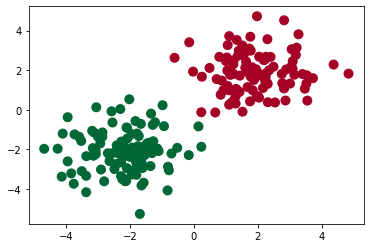

tensor([[ 1.0586,  3.2632,  0.0000],
        [ 1.8162,  2.1505,  0.0000],
        [ 2.1075,  1.7220,  0.0000],
        [-0.6021,  2.6245,  0.0000],
        [ 1.1316,  1.7949,  0.0000],
        [ 2.3976,  2.6699,  0.0000],
        [ 1.9463,  2.0467,  0.0000],
        [ 0.2329, -0.1205,  0.0000],
        [ 3.5191,  1.3318,  0.0000],
        [ 2.0031,  1.8465,  0.0000],
        [ 3.1396,  1.7698,  0.0000],
        [ 3.1877,  2.7677,  0.0000],
        [ 1.2412,  1.8147,  0.0000],
        [ 1.1442,  1.7654,  0.0000],
        [ 1.5785,  2.8488,  0.0000],
        [ 1.3224,  1.0555,  0.0000],
        [ 1.5185,  3.2434,  0.0000],
        [ 4.3693,  2.2829,  0.0000],
        [ 1.7655,  3.6892,  0.0000],
        [ 2.2716,  1.8635,  0.0000],
        [ 1.3052,  0.6814,  0.0000],
        [ 1.0306,  2.6403,  0.0000],
        [ 2.8201,  1.0849,  0.0000],
        [-0.1437,  3.4072,  0.0000],
        [ 1.9737,  4.7204,  0.0000],
        [ 1.4045,  2.9871,  0.0000],
        [ 3.0861,  2.0610,  0.0000],
 

In [59]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100,1)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100,1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)
# 0     1
# 1     1 2
# 2
x,y =  Variable(x), Variable(y)


plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy().squeeze(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat( (x, y), 1)


In [60]:
## Simple Logistic Regression Model

In [61]:
layer=nn.Linear(2,1,bias=True)
sig=nn.Sigmoid()

model=nn.Sequential(layer,sig)

In [62]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.0083, -0.4361]])),
             ('0.bias', tensor([0.0681]))])

In [63]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

cost_fun=torch.nn.BCELoss()

In [64]:
## Train the model

In [66]:
for i in range(100):
    
    pred=model(x)
    cost=cost_fun(pred,y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if i%10==0:
        pred_y = pred.data.numpy().squeeze(1)
        pred_y = np.round(pred_y, decimals=0).astype(int)
        print(pred_y[2])
        target_y = y.data.squeeze(1).numpy()
        #print(target_y)
        accuracy = sum(pred_y == target_y)/200
        print('Step',i,'Accuracy',accuracy)

0
Step 0 Accuracy 1.0
0
Step 10 Accuracy 1.0
0
Step 20 Accuracy 1.0
0
Step 30 Accuracy 1.0
0
Step 40 Accuracy 1.0
0
Step 50 Accuracy 1.0
0
Step 60 Accuracy 1.0
0
Step 70 Accuracy 1.0
0
Step 80 Accuracy 1.0
0
Step 90 Accuracy 1.0
